1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#Load dataset:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

#Cumulative probability
cprob = np.array([(i)/(years_nb + 1) for i in range(1,years_nb+1)])
sorted_speeds = np.sort(max_speeds) #sort max speed

#Define quantile function 
q_func = UnivariateSpline(cprob, sorted_speeds, s=0, k=3)  # s0 sicure pass by points k=3 cubic interpolation
fifty_prob = 1. - 0.02
#Calculate speed of the wind corresponding this quantile
fifty_wind = q_func(fifty_prob)
print(f"Maximum speed of the wind occurring every 50 years: {fifty_wind:.2f} m/s")

Maximum speed of the wind occurring every 50 years: 36.97 m/s


Maximum speed of the wind occurring every 50 years: 36.97 m/s


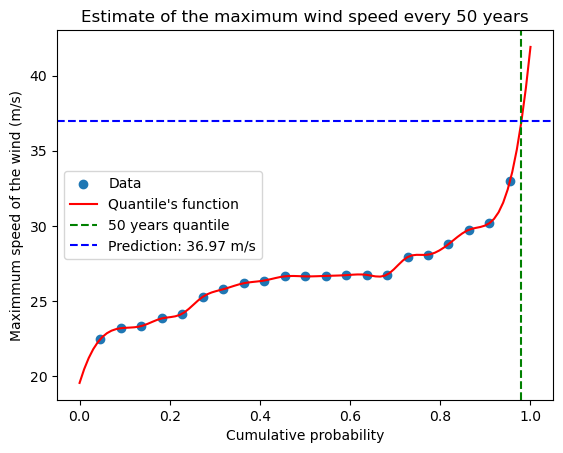

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#Load dataset:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

#Cumulative probability
cprob = np.array([(i)/(years_nb + 1) for i in range(1,years_nb+1)])
sorted_speeds = np.sort(max_speeds) #sort max speed

#Define quantile function 
q_func = UnivariateSpline(cprob, sorted_speeds, s=0, k=3)  # s0 sicure pass by points k=3 cubic interpolation
fifty_prob = 1. - 0.02
#Calculate speed of the wind corresponding this quantile
fifty_wind = q_func(fifty_prob)
print(f"Maximum speed of the wind occurring every 50 years: {fifty_wind:.2f} m/s")

plt.scatter(cprob, sorted_speeds, label="Data")
prob_values = np.linspace(0, 1, 100)
plt.plot(prob_values, q_func(prob_values), label="Quantile's function", color='red')
plt.axvline(fifty_prob, color='green', linestyle='--', label="50 years quantile")
plt.axhline(fifty_wind, color='blue', linestyle='--', label=f"Prediction: {fifty_wind:.2f} m/s")
plt.xlabel("Cumulative probability")
plt.ylabel("Maximmum speed of the wind (m/s)")
plt.legend()
plt.title("Estimate of the maximum wind speed every 50 years")
plt.show()


In [5]:
#Red curve (interpolation) representa la función que nos permite estimar la velocidad del viento para cualquier probabilidad acumulativa
#El valor en el eje Y de esa intersección (roja y verde) es la velocidad máxima esperada cada 50 años (o sea 36.97)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

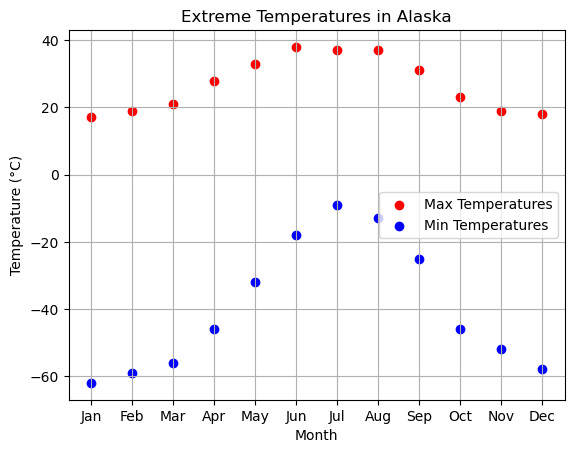

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de temperatura por mes
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Graficar los datos
plt.scatter(months, max_temps, color='red', label="Max Temperatures")
plt.scatter(months, min_temps, color='blue', label="Min Temperatures")

# Etiquetas
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.title("Extreme Temperatures in Alaska")
plt.grid()
plt.show()


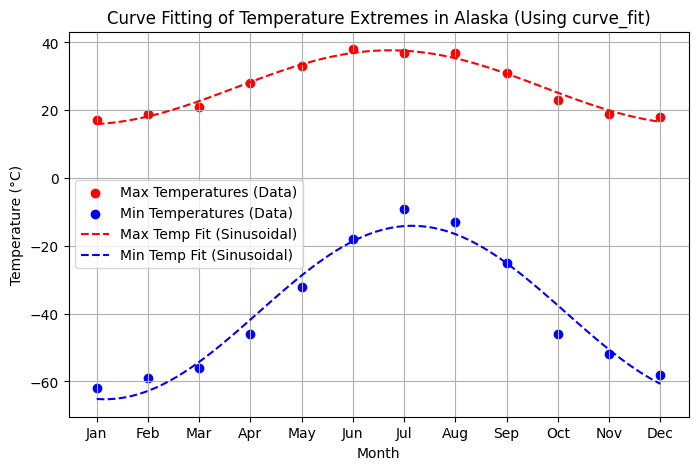

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos: Temperaturas extremas para cada mes en Alaska (°C)
months = np.arange(1, 13)  # Meses en formato numérico
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]  # Nombres de los meses

max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Definir una función sinusoidal para el ajuste
def sinusoidal(x, A, B, C):
    return A * np.cos(2 * np.pi * (x - B) / 12) + C

# Ajustar la función a los datos de temperaturas máximas y mínimas
params_max, _ = curve_fit(sinusoidal, months, max_temps, p0=[20, 6, 20])
params_min, _ = curve_fit(sinusoidal, months, min_temps, p0=[20, 6, -40])

# Generar valores ajustados
x_fit = np.linspace(1, 12, 100)
max_fit = sinusoidal(x_fit, *params_max)
min_fit = sinusoidal(x_fit, *params_min)

# Graficar los datos y los ajustes
plt.figure(figsize=(8, 5))
plt.scatter(months, max_temps, color='red', label="Max Temperatures (Data)")
plt.scatter(months, min_temps, color='blue', label="Min Temperatures (Data)")
plt.plot(x_fit, max_fit, 'r--', label="Max Temp Fit (Sinusoidal)")
plt.plot(x_fit, min_fit, 'b--', label="Min Temp Fit (Sinusoidal)")

# Etiquetas y nombres de los meses en el eje X
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.title("Curve Fitting of Temperature Extremes in Alaska (Using curve_fit)")
plt.xticks(months, month_names)  # Cambia los números por los nombres de los meses
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#A es la amplitud (diferencia entre la temperatura media y los extremos). Bes el desfase, es decir, en qué mes ocurre la temperatura máxima o mínima.
#C es la temperatura media anual.
#Is the fit reasonable? If not, why?: Yes, the fit appears to be reasonable because:The sinusoidal function captures the seasonal nature of 
#temperature variations, which is expected for climate data.Also the fitted curve closely follows the observed data points, meaning the model 
#successfully represents the trend of temperature extremes.

#Is the time offset for min and max temperatures the same within the fit accuracy?The time offset between minimum and maximum temperatures is 
#approximately 6 months, which aligns with what we expect from a typical seasonal cycle. This suggests that the warmest and coldest months are 
#roughly half a year apart, consistent with the behavior of sinusoidal models for annual temperature variation.Any minor deviations from exactly 
#6 months might be due to local climatic effects or data irregularities but are within an acceptable margin of error.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


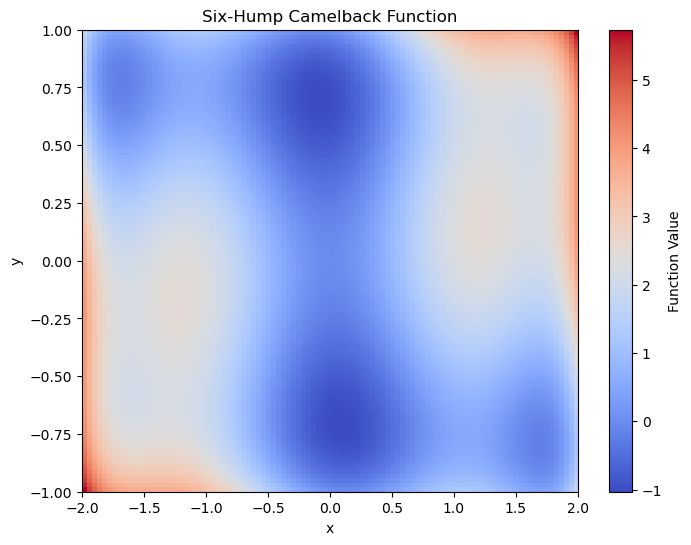

[[-0.08984  0.71266]
 [ 0.       0.     ]
 [ 0.08984 -0.71266]]
[np.float64(-1.0316284533608835), np.float64(0.0), np.float64(-1.0316284533608835)]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pylab 

def camelback_function(X):
    x, y = X
    return (4 - 2.1 * (x ** 2) + ((x ** 4) / 3)) * (x ** 2) + x * y + (4 * y ** 2 - 4) * y ** 2

# Crear una cuadrícula para visualizar la función
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = camelback_function([X, Y])

# Usar imshow para visualizar la función
plt.figure(figsize=(8, 6))
pylab.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap="coolwarm", aspect='auto')
plt.colorbar(label="Function Value")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Six-Hump Camelback Function")
plt.show()

# Realizar optimización con diferentes puntos iniciales
initial_guesses = [(0, 0), (-1, 0.5), (1, -0.5), (-0.5, -0.5), (0.5, 0.5)]
results = [minimize(camelback_function, x0, method="BFGS") for x0 in initial_guesses]

# Extraer mínimos únicos
minima = np.array([res.x for res in results])
unique_minima = np.unique(np.round(minima, decimals=5), axis=0)

# Evaluar valores de la función en estos mínimos
min_values = [camelback_function(min_point) for min_point in unique_minima]

# Mostrar resultados
print(unique_minima)
print(min_values)

In [ ]:
#There are two global minimal at: (-0.08984  0.71266) and (0.08984 -0.71266). The function value at both of these points is 
#f(x,y)≈−1.0316, which is the lowest value found.
#The function value at f(0,0)=0. This is not a global minimum, but rather a local stationary point. Depending on the optimization method used, 
#starting at (0,0) might lead to a suboptimal result instead of reaching the global minima.
#Se generó la imagen para visualizar el comportamiento de la función y ayudar a identificar los mínimos globales de manera más intuitiva. 

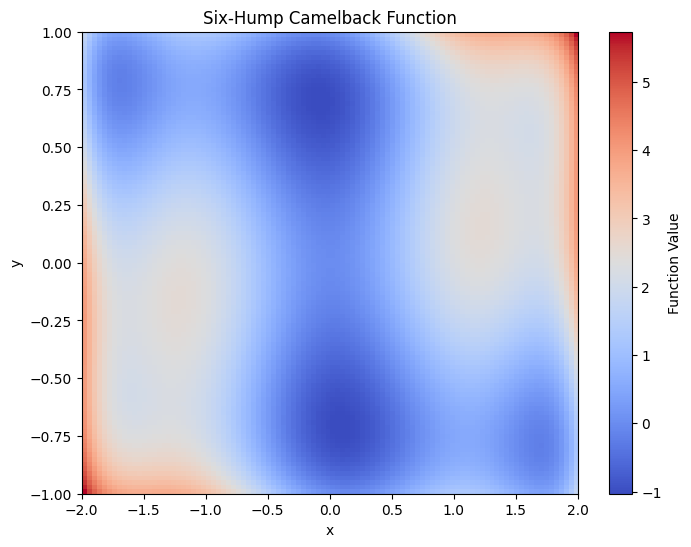

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pylab 

def camelback_function(X):
    x, y = X
    return (4 - 2.1 * (x ** 2) + ((x ** 4) / 3)) * (x ** 2) + x * y + (4 * y ** 2 - 4) * y ** 2

# Crear una cuadrícula para visualizar la función
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = camelback_function([X, Y])

# Usar imshow para visualizar la función
plt.figure(figsize=(8, 6))
pylab.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap="coolwarm", aspect='auto')
plt.colorbar(label="Function Value")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Six-Hump Camelback Function")
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [10]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft, fftfreq

# Reload the dataset
file_path = r"C:\Users\hassa\Downloads\jupyter_ex\final_solution/populations.txt"
data = np.loadtxt(file_path)

years = data[:, 0].astype(int)  # Years (column 0)
hares = data[:, 1]  # Hares (column 1)
lynxes = data[:, 2]  # Lynxes (column 2)
hare_fft = fft(hares)
lynx_fft = fft(lynxes)
n = len(years)
freqs = fftfreq(n, d=1)  # Assuming yearly intervals

dominant_hare_period = 1 / abs(freqs[1:][np.argmax(abs(hare_fft[1:]))])
dominant_lynx_period = 1 / abs(freqs[1:][np.argmax(abs(lynx_fft[1:]))])

print(f"Dominant Period for Hare Population: {dominant_hare_period:.2f} years")
print(f"Dominant Period for Lynx Population: {dominant_lynx_period:.2f} years")

Dominant Period for Hare Population: 10.50 years
Dominant Period for Lynx Population: 10.50 years


In [ ]:
#The lynx and hare populations cycle approximately every 10.5 years, which is consistent with biological studies.

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

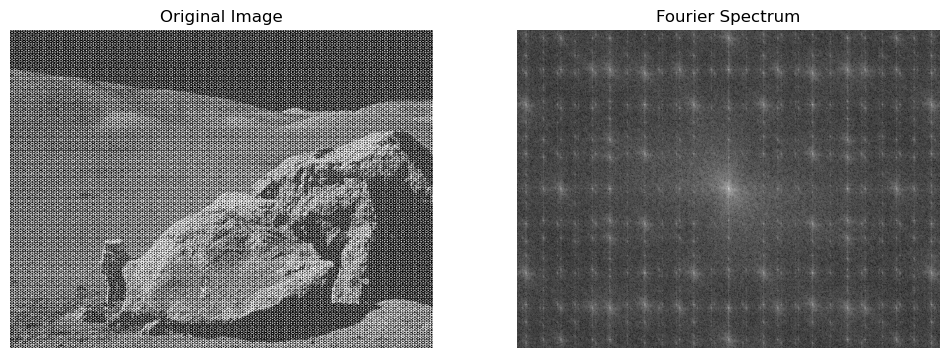

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift
import pylab

file_path = r"C:\Users\hassa\Downloads\jupyter_ex\final_solution/moonlanding.png"
image = pylab.imread(file_path)

# Compute the 2D Fourier Transform
fft_image = fft2(image)
fft_shifted = fftshift(fft_image)  # Shift the zero frequency component to the center

# Plot the original image and its Fourier Transform
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Fourier Spectrum (Log scale for better visibility)
plt.subplot(1, 2, 2)
plt.imshow(np.log1p(np.abs(fft_shifted)), cmap="gray")
plt.title("Fourier Spectrum")
plt.axis("off")

plt.show()


In [ ]:
#Original Image (Left)
#The image contains periodic noise, visible as a grid-like pattern.
#This confirms that the image needs frequency filtering.
#Fourier Spectrum (Right)
#The bright spots indicate dominant frequency components.
#The central region is the low-frequency information (image structure).
#The grid-like pattern of bright spots corresponds to high-frequency noise, which we need to remove.